In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # seaborn is a statistical data visualization library
import pandas as pd # pandas is the data analysis and visualization library
import statsmodels.api as sm
import math
from IPython.display import display, HTML
%matplotlib inline

In [9]:
sParams = ["Coil Diameter", "Wire Diameter", "Turn Number", "Spring Length"] 
constantParams = ["L40N5d4", "D32L50N5", "D32L50d4", "D32N5d4"]
names = [[25, 30, 50, 60], [3.4, 4.8, 6.2, 7.6], [4, 6, 8, 10], [25, 45, 65, 85]]

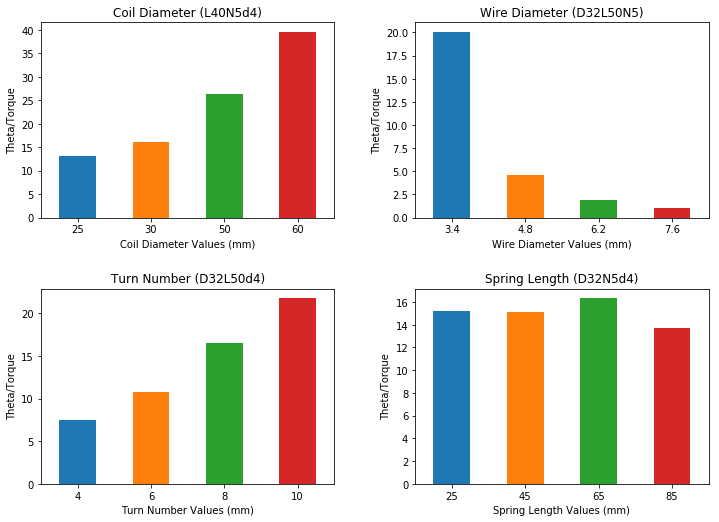

In [11]:
# axes for bar plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.tight_layout(w_pad=5, h_pad=5)

torsionThetaTorque = pd.read_excel("TorsionTestAnalysis.xlsx", sheet_name="Summary", skiprows=1, names=sParams, usecols=[5, 6, 7, 8], skipfooter=5)
for col in range(torsionThetaTorque.shape[1]):
    torsionThetaTorque.iloc[:, col].plot(title=torsionThetaTorque.columns[col] + " (" + constantParams[col] + ")", kind="bar", ax=axes[int(col / 2), col % 2])
    axes[int(col / 2), col % 2].set_xlabel(torsionThetaTorque.columns[col] + " Values (mm)")
    axes[int(col / 2), col % 2].set_ylabel("Theta/Torque")
    axes[int(col / 2), col % 2].set_xticklabels(names[col], rotation="0")

In [4]:
# print table of E values and averages of rows and columns
torsionThetaTorque.loc["Average"] = torsionThetaTorque.mean(numeric_only=True, axis=0).tolist() # add column average row
torsionThetaTorque.loc["Standard Deviation"] = torsionThetaTorque.std(numeric_only=True, axis=0).tolist() # add column average row
display(HTML(torsionThetaTorque.to_html()))

,Coil Diameter,Wire Diameter,Turn Number,Spring Length
0,13.215834,20.081203,7.461283,15.193714
1,16.123313,4.615053,10.815865,15.103811
2,26.431669,1.873564,16.532021,16.360426
3,39.624757,1.090831,21.816616,13.744468
Average,23.848893,6.915163,14.156446,15.100605
Standard Deviation,10.347646,7.713230,5.484210,0.926679
